# `01` ANN From Scratch

- Design your own simple ANN,(one perceptron with one input layer
and one output neuron)
- Use the data points listed in the adjacent Table as your training data.
- Assume the activation function is sigmoid.
- Assume there is no bias for simplicity (b=0).
- Test your design using different iteration numbers.


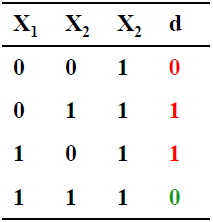

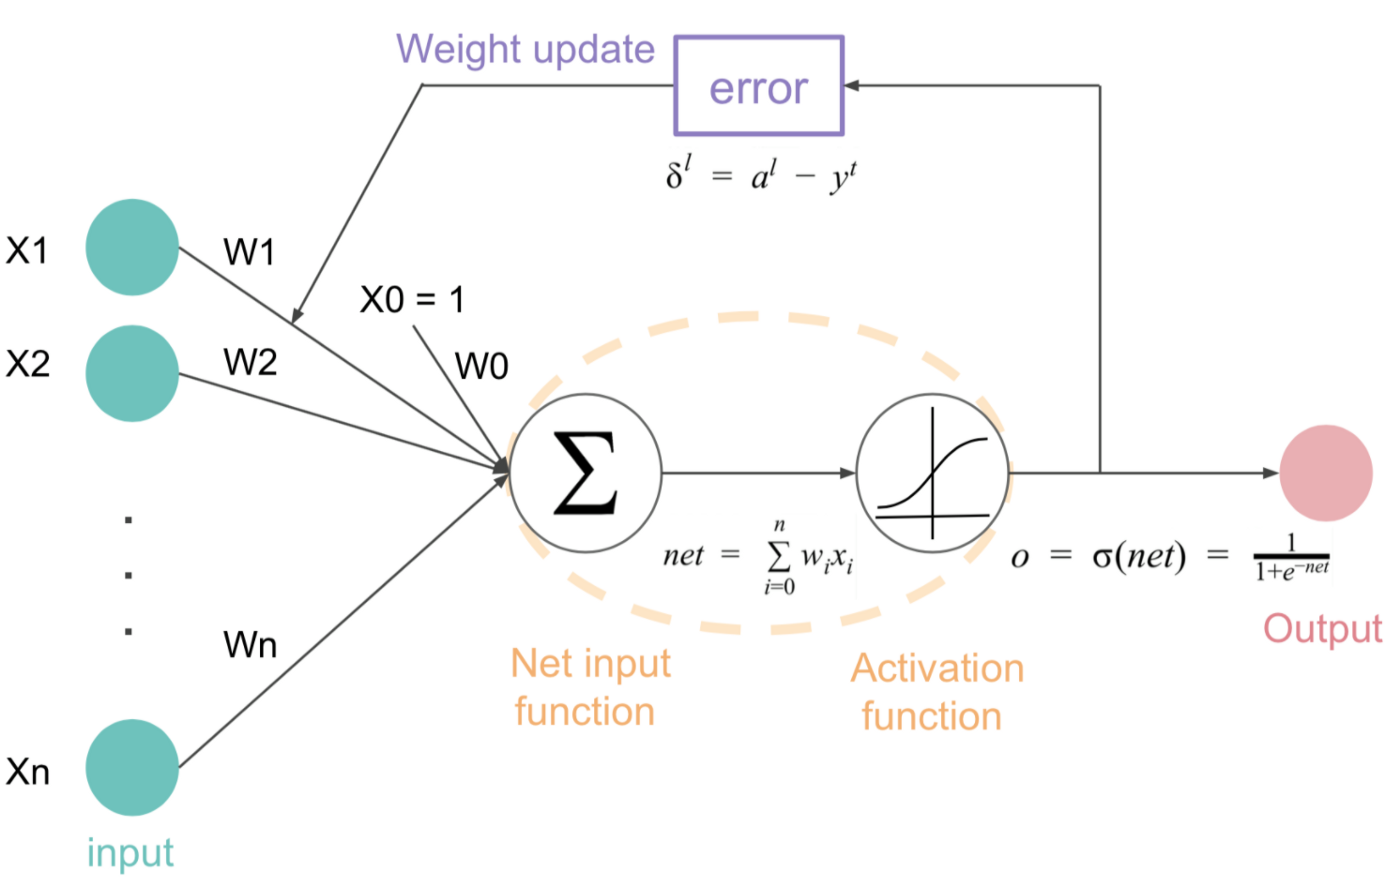

## `i` Implementation

In [47]:
import numpy as np

np.random.seed = 42

In [48]:
class ANN:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.weights = np.random.rand(self.X.shape[1], 1)
        

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))


    def sigmoid_derivative(self, p):
        return p * (1 - p)



    def feedforward(self):
        net = self.X @ self.weights
        output = self.sigmoid(net)
        return output



    def backprop(self):
        output = self.feedforward()
        error = self.y - output
        adjustments = error * self.sigmoid_derivative(output)
        self.weights += self.X.T @ adjustments        


    def fit(self, iterations, verbose=1):
        for i in range(iterations):
            self.backprop()
            if verbose:
                if i % 100 == 0:
                    print(f"Iteration {i} ==============================")
                    print("y_Actual: ")
                    print(self.y.flatten())
                    print("y_Predicted: ")
                    print(self.feedforward().flatten())
                    print("Loss: ")
                    print(np.mean(np.square(self.y - self.feedforward())))
                    print("\n")

## `ii` Testing

In [49]:
X = np.array([
    [0, 0, 1],
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1],
], dtype=float)


y = np.array([
    [0],
    [1],
    [1],
    [0],
], dtype=float)


print('X:\n', X, '\n')
print('y:\n', y)

X:
 [[0. 0. 1.]
 [1. 1. 1.]
 [1. 0. 1.]
 [0. 1. 1.]] 

y:
 [[0.]
 [1.]
 [1.]
 [0.]]


In [50]:
model = ANN(X, y)
model.fit(iterations=1000, verbose=1)

Iteration 0 ==============================
y_Actual: 
[0. 1. 1. 0.]
y_Predicted: 
[0.65512109 0.92212119 0.82847505 0.82321622]
Loss: 
0.28558862721001155


Iteration 100 ==============================
y_Actual: 
[0. 1. 1. 0.]
y_Predicted: 
[0.11100945 0.91022106 0.92702585 0.09062641]
Loss: 
0.008480431939364024


Iteration 200 ==============================
y_Actual: 
[0. 1. 1. 0.]
y_Predicted: 
[0.07576667 0.93862989 0.95053464 0.06125148]
Loss: 
0.00392636126605394


Iteration 300 ==============================
y_Actual: 
[0. 1. 1. 0.]
y_Predicted: 
[0.06068047 0.9507974  0.96037215 0.04898721]
Loss: 
0.0025182820916556867


Iteration 400 ==============================
y_Actual: 
[0. 1. 1. 0.]
y_Predicted: 
[0.05190338 0.95788328 0.96606776 0.04190027]
Loss: 
0.0018437021914562875


Iteration 500 ==============================
y_Actual: 
[0. 1. 1. 0.]
y_Predicted: 
[0.04601724 0.96263923 0.96988307 0.0371598 ]
Loss: 
0.0014503237134493698


Iteration 600 ===========================

----

# `02` ANN multi layer perceptron
- Modify the above designed code to implement a `multi layer perceptron`, `MLP` (an ANN with one input layer, one hidden layer and one output layer) for the same data points above
- Assume `sigmoid` activation function and there is `no bias` for simplicity (b=0)
- Test your approach using `different iteration numbers` and `different number of nodes` for the hidden layer (e.g. 4, 8 and 16)

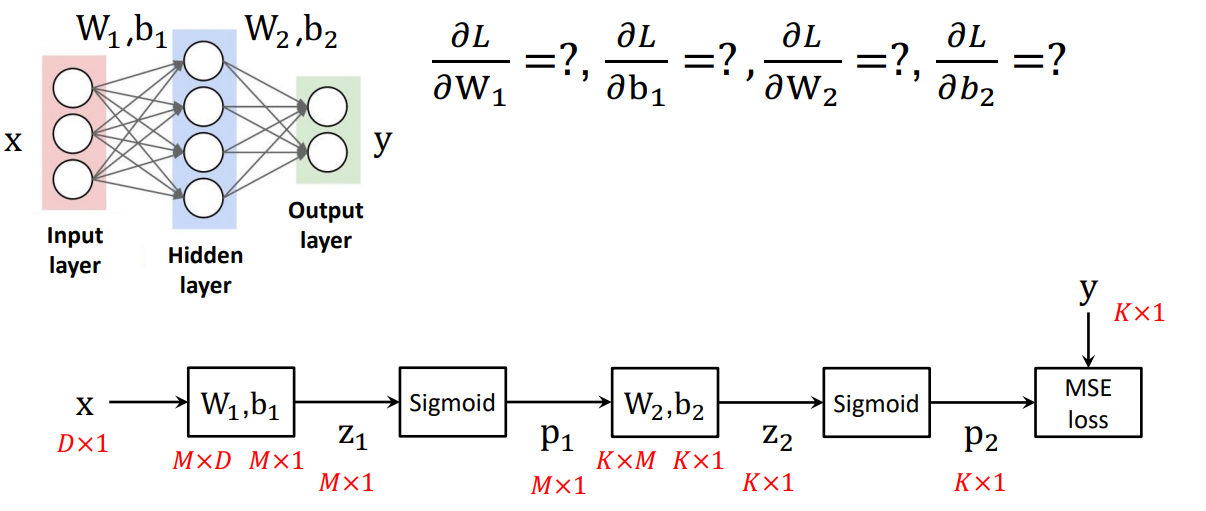

## `i` Implementation

In [51]:
class ANN:
    def __init__(self, X, y, num_hidden_nodes):
        self.X = X
        self.y = y
        self.num_hidden_nodes = num_hidden_nodes
        self.input_layer_size = X.shape[1]
        self.output_layer_size = y.shape[1]

        self.weights_input_hidden = np.random.rand(self.input_layer_size, self.num_hidden_nodes)
        self.weights_hidden_output = np.random.rand(self.num_hidden_nodes, self.output_layer_size)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, p):
        return p * (1 - p)

    def feedforward(self):
        self.hidden_layer_input = self.X @ self.weights_input_hidden
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_input)

        self.output_layer_input = self.hidden_layer_output @ self.weights_hidden_output
        self.output_layer_output = self.sigmoid(self.output_layer_input)

        return self.output_layer_output

    def backprop(self):
        output_error = self.y - self.output_layer_output
        output_adjustments = output_error * self.sigmoid_derivative(self.output_layer_output)

        hidden_error = output_adjustments @ self.weights_hidden_output.T
        hidden_adjustments = hidden_error * self.sigmoid_derivative(self.hidden_layer_output)

        self.weights_hidden_output += self.hidden_layer_output.T @ output_adjustments
        self.weights_input_hidden += self.X.T @ hidden_adjustments

    def fit(self, iterations, verbose=1):
        for i in range(iterations):
            self.feedforward()
            self.backprop()
            if verbose and i % 100 == 0:
                print(f"Iteration {i} ==============================")
                print("y_Actual: ")
                print(self.y.flatten())
                print("y_Predicted: ")
                print(self.feedforward().flatten())
                print("Loss: ")
                print(np.mean(np.square(self.y - self.feedforward())))
                print("\n")

## `ii` Testing

In [52]:
X = np.array([
    [0, 0, 1],
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1],
], dtype=float)


y = np.array([
    [0],
    [1],
    [1],
    [0],
], dtype=float)


print('X:\n', X, '\n')
print('y:\n', y)

X:
 [[0. 0. 1.]
 [1. 1. 1.]
 [1. 0. 1.]
 [0. 1. 1.]] 

y:
 [[0.]
 [1.]
 [1.]
 [0.]]


In [53]:
model = ANN(X, y, 8)
model.fit(iterations=1000, verbose=1)

Iteration 0 ==============================
y_Actual: 
[0. 1. 1. 0.]
y_Predicted: 
[0.8997705  0.93090874 0.91878006 0.91671706]
Loss: 
0.41533185191257516


Iteration 100 ==============================
y_Actual: 
[0. 1. 1. 0.]
y_Predicted: 
[0.11547617 0.89202924 0.91485858 0.08790515]
Loss: 
0.009992202478366859


Iteration 200 ==============================
y_Actual: 
[0. 1. 1. 0.]
y_Predicted: 
[0.06022002 0.94318269 0.95484561 0.04658635]
Loss: 
0.0027659659508581223


Iteration 300 ==============================
y_Actual: 
[0. 1. 1. 0.]
y_Predicted: 
[0.04404942 0.95831932 0.96663123 0.03441153]
Loss: 
0.001493814690660383


Iteration 400 ==============================
y_Actual: 
[0. 1. 1. 0.]
y_Predicted: 
[0.03591623 0.96596622 0.97260402 0.02823757]
Loss: 
0.0009990433925859564


Iteration 500 ==============================
y_Actual: 
[0. 1. 1. 0.]
y_Predicted: 
[0.03088272 0.97071075 0.9763221  0.02439281]
Loss: 
0.0007418137403314427


Iteration 600 ==========================

---

# `03` ANN using tensorflow keras library
- Use the `Keras` library tensorflow keras to build different ANNs using different numbers of hidden layers:
  - `shallow`  : 1 hidden, output layer
  - `deeper`   : two hidden layers with 12 and 8 nodes respectively
  - `more deep`: three hidden layers with 32 16 8 nodes respectively

Use the diabetic dataset provided [here](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) to train and test your design Use the `ReLU` activation for the hidden layers and the `sigmoid` activation for the output neuron,
- `loss='binary_crossentropy'`
- `optimizer='adam'`
- `metrics=['accuracy’]`
- `epochs=150`

## `0` Import Libraries & Load Dataset

In [54]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Input
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

np.random.seed = 42

In [55]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [56]:
dataset.shape

(768, 9)

In [57]:
X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']

In [58]:
X.shape

(768, 8)

In [59]:
y.shape

(768,)

In [60]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## `i` Shallow network


In [61]:
model = Sequential()

model.add(Dense(5, activation="relu", input_shape=(x_train.shape[1],)))
model.add(Dense(1, activation="sigmoid"))

model.summary()

c:\Users\abdal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 5)              │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.compile(optimizer=keras.optimizers.Adam(0.01), loss="binary_crossentropy", metrics=["accuracy"])

In [63]:
X.shape

(768, 8)

In [64]:
768/32

24.0

In [65]:
history = model.fit(x_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.6104 - loss: 6.0235 - val_accuracy: 0.6098 - val_loss: 1.3386
Epoch 2/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5298 - loss: 1.2160 - val_accuracy: 0.5285 - val_loss: 0.8770
Epoch 3/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6094 - loss: 0.8739 - val_accuracy: 0.6341 - val_loss: 0.6962
Epoch 4/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6703 - loss: 0.7780 - val_accuracy: 0.6504 - val_loss: 0.6421
Epoch 5/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6760 - loss: 0.7237 - val_accuracy: 0.5772 - val_loss: 0.7183
Epoch 6/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6250 - loss: 0.6905 - val_accuracy: 0.6829 - val_loss: 0.6228
Epoch 7/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6631 - loss: 0.6941 - val_accuracy: 0.6829 - val_loss: 0.6142
Epoch 8/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6132 - loss: 0.7214 - val_accuracy: 0.

In [66]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [67]:
loss, accuracy = model.evaluate(x_train, y_train)
[loss, accuracy]

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7185 - loss: 0.5523 


[0.5646962523460388, 0.7100977301597595]

In [68]:
print("Train Accuracy: ",accuracy)

Train Accuracy:  0.7100977301597595


In [69]:
loss, accuracy = model.evaluate(x_test, y_test)
[loss, accuracy]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6930 - loss: 0.5971


[0.6325430870056152, 0.6818181872367859]

In [70]:
print("Test Accuracy: ",accuracy)

Test Accuracy:  0.6818181872367859


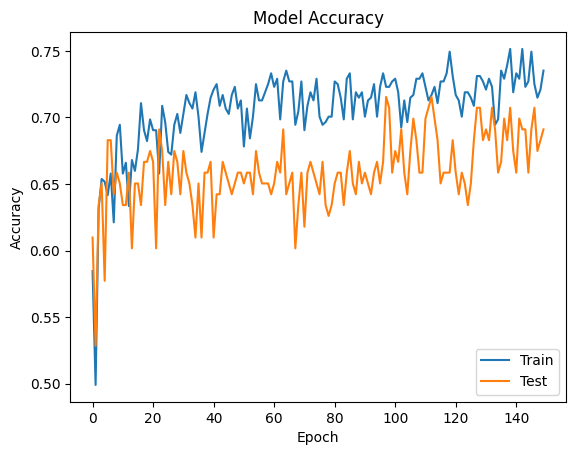

In [71]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

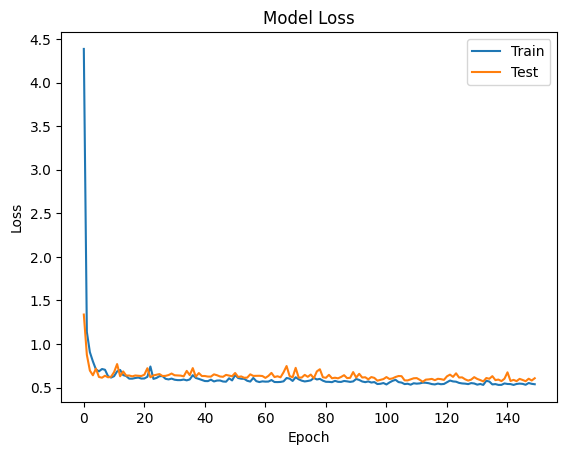

In [72]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

## `ii` Deep network


In [73]:
model2 = Sequential()
model2.add(Input(shape=(x_train.shape[1],)))
model2.add(Dense(12, activation="relu"))
model2.add(Dense(8, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))

model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [74]:
model2.compile(optimizer=keras.optimizers.Adam(0.01), loss="binary_crossentropy", metrics=["accuracy"])

In [75]:
history2 = model2.fit(x_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5510 - loss: 5.6997 - val_accuracy: 0.5041 - val_loss: 1.5753
Epoch 2/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4853 - loss: 1.3277 - val_accuracy: 0.5041 - val_loss: 1.1595
Epoch 3/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5547 - loss: 1.0086 - val_accuracy: 0.6179 - val_loss: 0.8354
Epoch 4/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6553 - loss: 0.7875 - val_accuracy: 0.6829 - val_loss: 0.6524
Epoch 5/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6107 - loss: 0.8273 - val_accuracy: 0.6016 - val_loss: 0.7662
Epoch 6/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6947 - loss: 0.7685 - val_accuracy: 0.5610 - val_loss: 0.8563
Epoch 7/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5911 - loss: 0.9126 - val_accuracy: 0.5610 - val_loss: 0.7266
Epoch 8/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6722 - loss: 0.7279 - val_accuracy: 0.5

In [76]:
history2.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [77]:
loss, accuracy = model2.evaluate(x_train, y_train)
[loss, accuracy]

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7915 - loss: 0.4730 


[0.4822896122932434, 0.776872992515564]

In [78]:
print("Train Accuracy: ",accuracy)

Train Accuracy:  0.776872992515564


In [79]:
loss, accuracy = model2.evaluate(x_test, y_test)
[loss, accuracy]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6873 - loss: 0.6014


[0.5847790837287903, 0.7142857313156128]

In [80]:
print("Test Accuracy: ",accuracy)

Test Accuracy:  0.7142857313156128


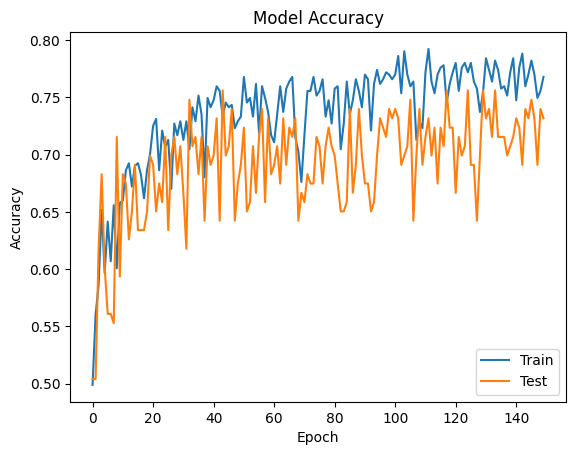

In [81]:
plt.plot(history2.history['accuracy'], label='Train')
plt.plot(history2.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

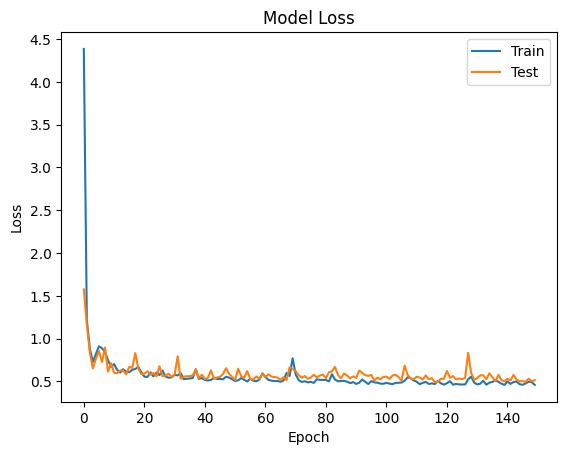

In [82]:
plt.plot(history2.history['loss'], label='Train')
plt.plot(history2.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.ylabel('Loss') 
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

## `iii` Deeper network


In [93]:
model3 = Sequential()
model3.add(Input(shape=(x_train.shape[1],)))
model3.add(Dense(32, activation="relu"))
model3.add(Dense(16, activation="relu"))
model3.add(Dense(8, activation="relu"))
model3.add(Dense(1, activation="sigmoid"))

model3.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 961 (3.75 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
model3.compile(optimizer=keras.optimizers.Adam(0.01), loss="binary_crossentropy", metrics=["accuracy"])

In [95]:
history3 = model3.fit(x_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.5306 - loss: 1.3689 - val_accuracy: 0.6992 - val_loss: 0.6075
Epoch 2/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5747 - loss: 0.7117 - val_accuracy: 0.7154 - val_loss: 0.6155
Epoch 3/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6490 - loss: 0.6528 - val_accuracy: 0.6260 - val_loss: 0.6532
Epoch 4/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6478 - loss: 0.6535 - val_accuracy: 0.7480 - val_loss: 0.5729
Epoch 5/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7022 - loss: 0.5842 - val_accuracy: 0.7317 - val_loss: 0.5845
Epoch 6/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6615 - loss: 0.6096 - val_accuracy: 0.6504 - val_loss: 0.6068
Epoch 7/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6887 - loss: 0.6121 - val_accuracy: 0.6341 - val_loss: 0.6961
Epoch 8/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6705 - loss: 0.5972 - val_accuracy: 0.6667 - val_los

In [96]:
history3.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [97]:
loss, accuracy = model3.evaluate(x_train, y_train)
[loss, accuracy]

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7803 - loss: 0.4491


[0.45735153555870056, 0.7801302671432495]

In [98]:
print("Train Accuracy: ",accuracy)

Train Accuracy:  0.7801302671432495


In [99]:
loss, accuracy = model3.evaluate(x_test, y_test)
[loss, accuracy]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7069 - loss: 0.6024


[0.6286983489990234, 0.7077922224998474]

In [100]:
print("Test Accuracy: ",accuracy)

Test Accuracy:  0.7077922224998474


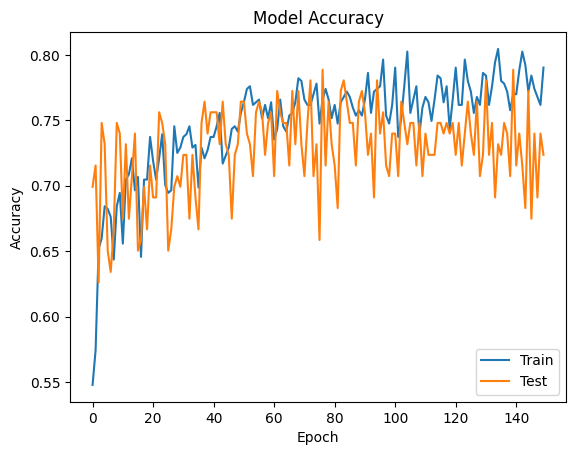

In [101]:
plt.plot(history3.history['accuracy'], label='Train')
plt.plot(history3.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

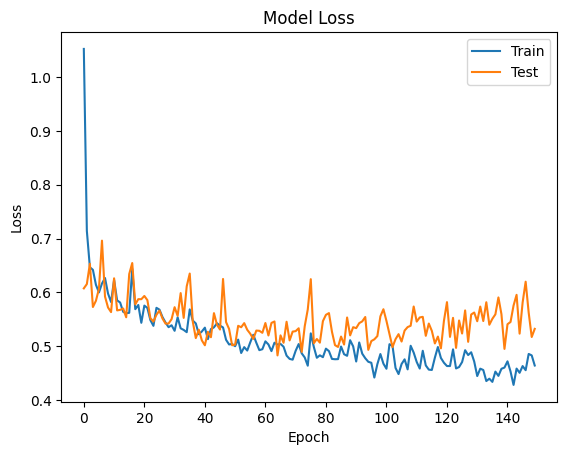

In [102]:
plt.plot(history3.history['loss'], label='Train')
plt.plot(history3.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
